<a href="https://colab.research.google.com/github/SriSathwik1905/CyberBullying/blob/main/Linear_SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
# Load the dataset
df = pd.read_csv("final_hateXplain.csv")

# Display the first few rows
print(df.head())

                                             comment       label     Race  \
0                     0 u0 lmao wow fuck you too 😂 😂      normal  No_race   
1  1 0 th floor maybe wow cnn with the fakenews t...   offensive  No_race   
2  1 0 yrs <number> white women raped by niggers ...  hatespeech  African   
3  1 2 h ago ching chong accepted your friend req...   offensive    Asian   
4  1 8 th century mayhem and lawlessness had noth...      normal  No_race   

       Religion     Gender Sexual Orientation Miscellaneous  
0  Nonreligious  No_gender     No_orientation           NaN  
1  Nonreligious  No_gender     No_orientation         Other  
2  Nonreligious  No_gender     No_orientation           NaN  
3  Nonreligious  No_gender     No_orientation           NaN  
4  Nonreligious  No_gender     No_orientation           NaN  


In [ ]:
# Download the stopwords
nltk.download('stopwords')

# Initialize stemmer
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Function to preprocess text
def preprocess_text(text):
    # Remove non-alphabetical characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]
    # Apply stemming
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

In [ ]:
# Apply preprocessing
df['cleaned_comment'] = df['comment'].apply(preprocess_text)

In [ ]:
# Display the first few cleaned comments
print(df['cleaned_comment'].head())

0                                      u lmao wow fuck
1    th floor mayb wow cnn fakenew bodi count go wa...
2    yr number white women rape nigger number negre...
3              h ago ching chong accept friend request
4    th centuri mayhem lawless noth loud mouth dona...
Name: cleaned_comment, dtype: object


In [ ]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)
# Fit and transform the cleaned comments
X = tfidf.fit_transform(df['cleaned_comment']).toarray()

In [ ]:
# Extract labels
y = df['label']

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Ensure labels are numeric
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
# Initialize LinearSVC
linear_svc = LinearSVC(random_state=100)

In [ ]:
# Train the model
linear_svc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(random_state=100)

In [ ]:
# Predict on the test set
y_pred_svc = linear_svc.predict(X_test)

In [ ]:
# Evaluate the model's performance
svc_accuracy = accuracy_score(y_test, y_pred_svc)
print(f"Linear SVC Accuracy: {svc_accuracy:.2f}")

Linear SVC Accuracy: 0.62


In [ ]:
# Classification report
print("\nLinear SVC Classification Report:")
print(classification_report(y_test, y_pred_svc))


Linear SVC Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.69      0.69      1286
           1       0.63      0.70      0.66      1548
           2       0.50      0.41      0.45      1188

    accuracy                           0.62      4022
   macro avg       0.60      0.60      0.60      4022
weighted avg       0.61      0.62      0.61      4022



In [ ]:
# Confusion Matrix
svc_cm = confusion_matrix(y_test, y_pred_svc)

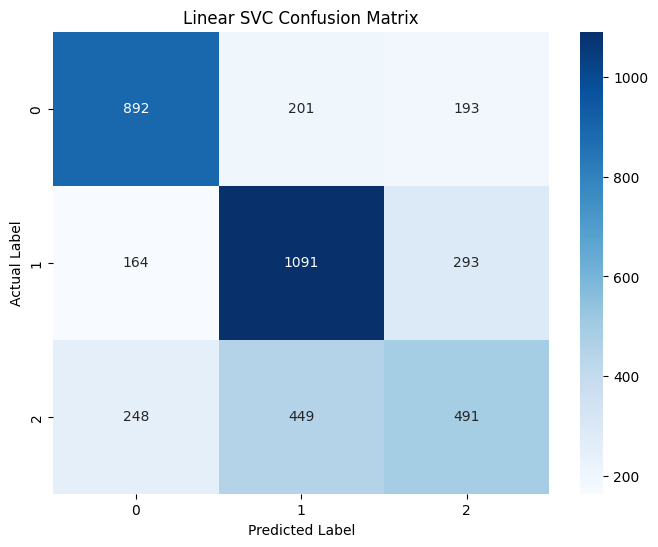

In [ ]:
# Plotting Confusion Matrix for Linear SVC
plt.figure(figsize=(8, 6))
sns.heatmap(svc_cm, annot=True, fmt='d', cmap='Blues', xticklabels=linear_svc.classes_, yticklabels=linear_svc.classes_)
plt.title('Linear SVC Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Extract feature importance
# LinearSVC does not have a feature_importances_ attribute, but we can look at the coefficients
coefficients = np.abs(linear_svc.coef_).flatten()

In [ ]:
# Extract feature importance for SVC (assuming binary classification)
svc_feature_importance = pd.DataFrame({
    'feature': tfidf.get_feature_names_out(),
    'coefficient': linear_svc.coef_[0]  # Access the coefficients for the first (and likely only) class
})

print(svc_feature_importance)

         feature  coefficient
0             aa     0.171796
1             ab    -0.094277
2        abandon     0.546271
3            abc     0.239881
4         abduct     0.141689
...          ...          ...
4995         zog    -1.126568
4996       zombi    -0.121648
4997        zone     0.024985
4998         zoo     1.001173
4999  zuckerberg     0.543874

[5000 rows x 2 columns]


In [ ]:
# Sort by the absolute value of coefficient
svc_feature_importance = svc_feature_importance.sort_values(by='coefficient', ascending=False)

# Display the top 10 important features
print("Top 10 important features for Linear SVC:")
print(svc_feature_importance.head(10))

Top 10 important features for Linear SVC:
       feature  coefficient
2449      kike     5.111798
3019    nigger     5.070788
389     beaner     3.239172
2932     muzzi     3.043490
2975   negress     2.999830
964       coon     2.973985
3935   sheboon     2.719429
2906  mudshark     2.700726
2931    muzrat     2.686175
3025    niglet     2.622628
